# Backpropagation 
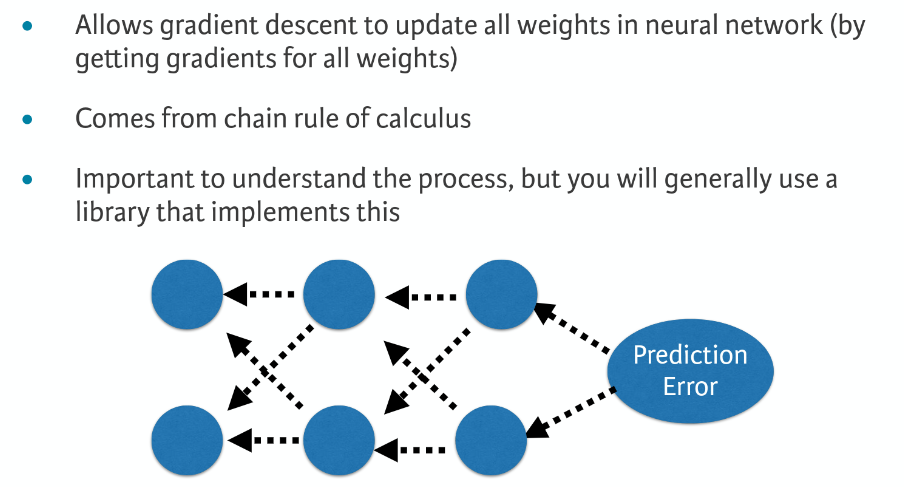
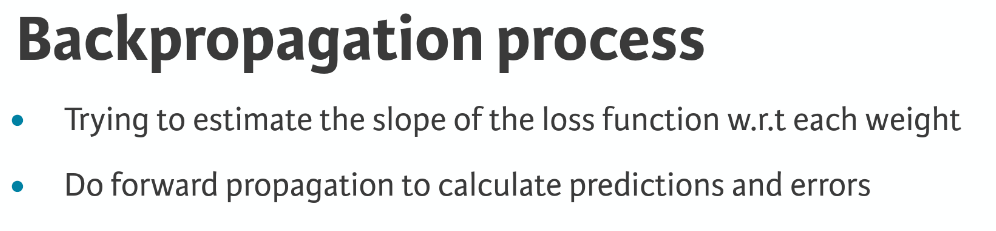
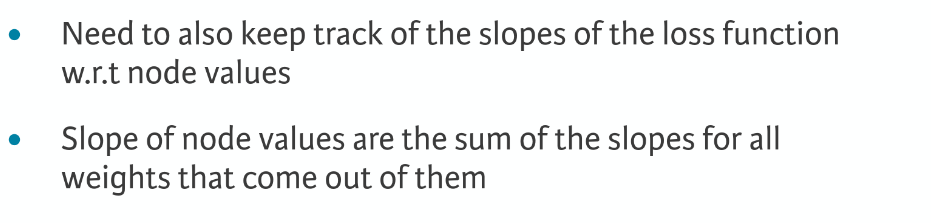

The Backpropagation algorithm is a supervised learning method for multilayer feed-forward networks from the field of Artificial Neural Networks.

The principle of the backpropagation approach is to model a given function by modifying internal weightings of input signals to produce an expected output signal. The system is trained using a supervised learning method, where the error between the system’s output and a known expected output is presented to the system and used to modify its internal state.

# Creating a keras model
 -  specify architecture ( how many layers, how many nodes, activation function)
 - compile  (optimization)
 - Fit
 - Predictions

### Model specification

#### Regresion Models

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

In [3]:
df = pd.read_csv('./data/hourly_wages.csv')
df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


The target variable you'll be predicting is wage_per_hour. Some of the predictor variables are binary indicators, where a value of 1 represents True, and 0 represents False.

In [4]:
df.describe()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,9.024064,0.179775,13.018727,17.822097,36.833333,0.458801,0.655431,0.292135,0.185393,0.044944
std,5.139097,0.384360,2.615373,12.379710,11.726573,0.498767,0.475673,0.455170,0.388981,0.207375
min,1.000000,0.000000,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,0.000000,12.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.780000,0.000000,12.000000,15.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.250000,0.000000,15.000000,26.000000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,44.500000,1.000000,18.000000,55.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Specifying a model
Now you'll get to work with your first model in Keras, and will immediately be able to run more complex neural network models on larger datasets compared to the first two chapters.

To start, you'll take the skeleton of a neural network and add a hidden layer and an output layer. You'll then fit that model and see Keras do the optimization so your model continually gets better.

As a start, you'll predict workers wages based on characteristics like their industry, education and level of experience. You can find the dataset in a pandas dataframe called df. For convenience, everything in df except for the target has been converted to a NumPy matrix called predictors. The target, wage_per_hour, is available as a NumPy matrix called target

In [5]:
predictors = df.iloc[:, 1:].to_numpy()
target = df.iloc[:, 0].to_numpy()

In [7]:
import tensorflow as tf

n_cols = predictors.shape[1]

# Set up the model: model
model = tf.keras.Sequential()

# Add the first layer
model.add(tf.keras.layers.Dense(50, activation='relu', input_shape=(n_cols, )))

# Add the second layer
model.add(tf.keras.layers.Dense(32, activation='relu'))

# Add the output layer
model.add(tf.keras.layers.Dense(1))

### Compiling the model
You're now going to compile the model you specified earlier. To compile the model, you need to specify the optimizer and loss function to use. 

In [8]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


### Fitting the model
You're at the most fun part. You'll now fit the model. Recall that the data to be used as predictive features is loaded in a NumPy matrix called predictors and the data to be predicted is stored in a NumPy matrix called target. Your model is pre-written and it has been compiled with the code from the previous exercise.

In [10]:
model.fit(predictors, target, epochs=10);

Epoch 1/10
17/17 [==============================] - 0s 2ms/step - loss: 20.5854
Epoch 2/10
17/17 [==============================] - 0s 2ms/step - loss: 20.5581
Epoch 3/10
17/17 [==============================] - 0s 2ms/step - loss: 21.0408
Epoch 4/10
17/17 [==============================] - 0s 2ms/step - loss: 21.0291
Epoch 5/10
17/17 [==============================] - 0s 2ms/step - loss: 20.3096
Epoch 6/10
17/17 [==============================] - 0s 2ms/step - loss: 20.3586
Epoch 7/10
17/17 [==============================] - 0s 2ms/step - loss: 19.9883
Epoch 8/10
17/17 [==============================] - 0s 2ms/step - loss: 19.6520
Epoch 9/10
17/17 [==============================] - 0s 2ms/step - loss: 20.1921
Epoch 10/10
17/17 [==============================] - 0s 2ms/step - loss: 19.6749


#### Classification models
Understanding your classification data
Now you will start modeling with a new dataset for a classification problem. This data includes information about passengers on the Titanic.

In [28]:
df = pd.read_csv('./data/titanic_all_numeric.csv')
df.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [29]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


Last steps in classification models


You'll now create a classification model using the titanic dataset, which has been pre-loaded into a DataFrame called df. You'll take information about the passengers and predict which ones survived.

The predictive variables are stored in a NumPy array predictors. The target to predict is in df.survived, though you'll have to manipulate it for keras. The number of predictive features is stored in n_cols.

Here, you'll use the 'sgd' optimizer, which stands for Stochastic Gradient Descent

In [30]:
predictors = df.iloc[:, 1:].astype(np.float32).to_numpy()
target = df.survived.astype(np.float32).to_numpy()
n_cols = predictors.shape[1]

In [31]:
from tensorflow.keras.utils import to_categorical

# Convert the target to categorical: target
target = to_categorical(target)

# Set up the model
model = tf.keras.Sequential()

# Add the first layer
model.add(tf.keras.layers.Dense(32, activation='relu', input_shape=(n_cols, )))

# Add the second layer
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(predictors, target, epochs=10);

Epoch 1/10
28/28 [==============================] - 0s 2ms/step - loss: 1.9587 - accuracy: 0.6004
Epoch 2/10
28/28 [==============================] - 0s 2ms/step - loss: 0.9806 - accuracy: 0.5915
Epoch 3/10
28/28 [==============================] - 0s 2ms/step - loss: 0.7360 - accuracy: 0.6285
Epoch 4/10
28/28 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.6521
Epoch 5/10
28/28 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.6409
Epoch 6/10
28/28 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.6745
Epoch 7/10
28/28 [==============================] - 0s 2ms/step - loss: 0.6103 - accuracy: 0.6880
Epoch 8/10
28/28 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.6644
Epoch 9/10
28/28 [==============================] - 0s 2ms/step - loss: 0.6159 - accuracy: 0.7003
Epoch 10/10
28/28 [==============================] - 0s 2ms/step - loss: 0.6004 - accuracy: 0.7037
